## Diejkstar Vs Greedy Choice

in this notebook we will explore how the greedy choice can be used to solve the shortest path problem. 
We will compare the greedy choice with the Dijkstra algorithm and see how efficient the greedy choice in graph problems.


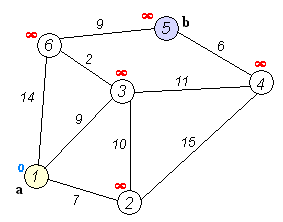

### Setup

In [35]:
# install graph realted packages
%pip install matplotlib numpy networkx plotly


Note: you may need to restart the kernel to use updated packages.


### Generate a random graph

Generating random graph with N=6 nodes and M=15 edges


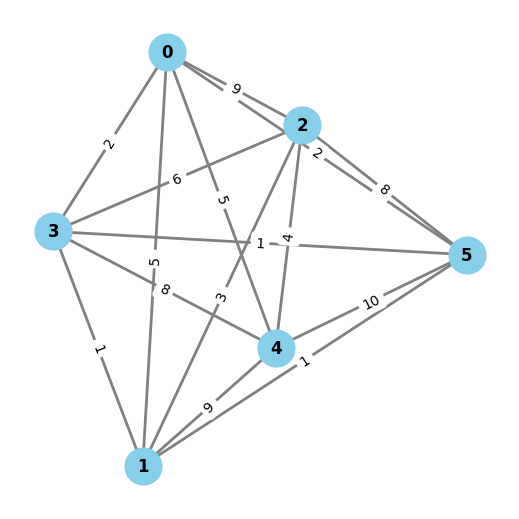

In [36]:
import random
import math
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

# Set a fixed seed for the random number generator
random.seed(0)
np.random.seed(0)

def generate_random_graph(N, M=math.inf):
    G = nx.Graph()
    for i in range(N):
        G.add_node(i)

    # Calculate the maximum number of possible edges
    # Ensure M is not bigger than the maximum number of possible edges
    max_edges = (N * (N - 1)) // 2  

    M = min(M, max_edges)  
    print("Generating random graph with N={} nodes and M={} edges".format(N, M))

    for i in range(M):
        u = random.randint(0, N-1)
        v = random.randint(0, N-1)
        while u == v or G.has_edge(u, v):
            u = random.randint(0, N-1)
            v = random.randint(0, N-1)
        weight = random.randint(1, 10)  # Generate a random weight between 1 and 10
        G.add_edge(u, v, weight=weight)  # Assign the random weight to the edge
    return G

# implement plot graph
def plot_graph(G, pos=None,path=None):
    if pos is None:
        pos = nx.spring_layout(G,seed=0)

        
    plt.figure(figsize=(5, 5))
    nx.draw(G, pos, with_labels=True, node_size=700, node_color="skyblue", font_weight="bold", width=2, edge_color="gray")
    edge_labels = nx.get_edge_attributes(G, "weight")
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
    if path is not None:
        nx.draw_networkx_edges(
            G,
            pos,
            edgelist=[(path[i], path[i + 1]) for i in range(len(path) - 1)],
            edge_color="red",
            width=2,
        )

    plt.axis("off")
    plt.show()  

G = generate_random_graph(6)
plot_graph(G)


### Dijkstra algorithm

Shortest path from node 1 to node 4 is: [1, 2, 4]
Shortest path length: 7


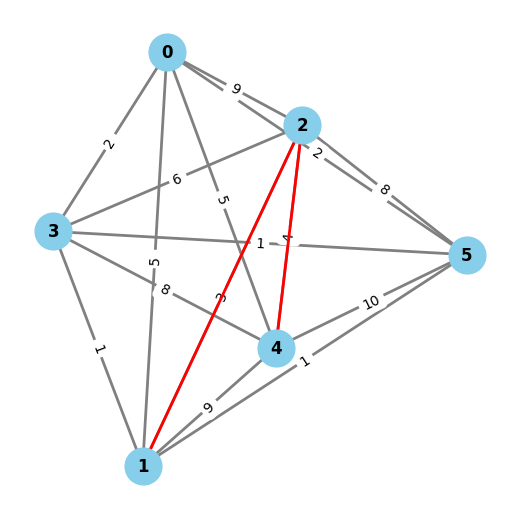

In [37]:
def dijkstra(G, start,end):
    shortest_path = nx.dijkstra_path(G, start, end)
    shortest_path_length = nx.dijkstra_path_length(G, start, end)
    print("Shortest path from node {} to node {} is: {}".format(start, end, shortest_path))
    print("Shortest path length: {}".format(shortest_path_length))

    return shortest_path, shortest_path_length


shortest_path, shortest_path_length = dijkstra(G, 1, 4)
plot_graph(G, path=shortest_path)

### Blind Greedy algorithm (cares only about the cheapest edge)

Greedy path from node 1 to node 4 is: [1, 5, 3, 0, 4]
Greedy path length: 9


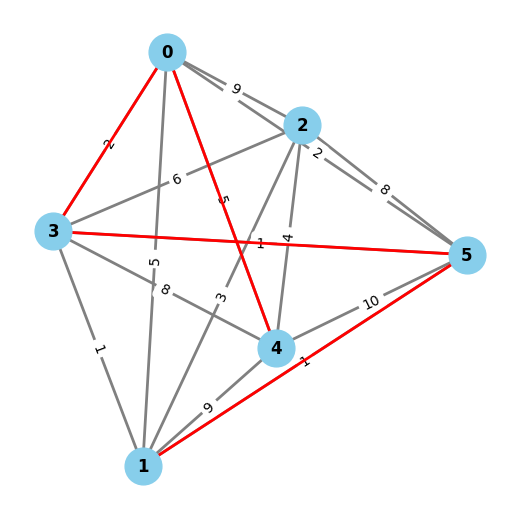

In [38]:
def blind_greedy(G, start, end):
    path = [start]
    current = start
    while current != end:
        # print("Current node: {}".format(current))
        neighbors = G[current]
        # Exclude all the nodes in path from neighbors
        neighbors = {node: neighbors[node] for node in neighbors if node not in path}
        # print("Neighbors: {}".format(neighbors))
        next_node = min(neighbors, key=lambda x: neighbors[x]["weight"])
        # print("Next node: {}".format(next_node))
        path.append(next_node)
        current = next_node
    path_length = sum(G[path[i]][path[i + 1]]["weight"] for i in range(len(path) - 1))
    print("Greedy path from node {} to node {} is: {}".format(start, end, path))
    print("Greedy path length: {}".format(path_length))

    return path, path_length

blind_greedy_path, blind_greedy_path_length = blind_greedy(G, 1, 4)
plot_graph(G, path=blind_greedy_path)

### Better Greedy algorithm
- can check if the destination is nearby even if the edge is expensive

Greedy path from node 1 to node 4 is: [1, 4]
Greedy path length: 9


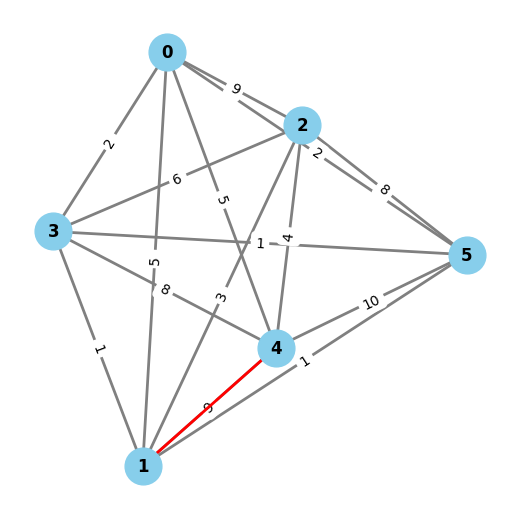

In [41]:
# can check if the destination is nearby even if the edge is expensive)
def better_greedy(G, start,end):
    path = [start]
    current = start
    while current != end:
        neighbors = G[current]
        neighbors = {node: neighbors[node] for node in neighbors if node not in path}

        # if destination is in neighbors, go to destination even if the edge is expensive
        if end in neighbors:
            path.append(end)
            break

        next_node = min(neighbors, key=lambda x: neighbors[x]["weight"])
        path.append(next_node)
        current = next_node
    path_length = sum(G[path[i]][path[i + 1]]["weight"] for i in range(len(path) - 1))
    print("Greedy path from node {} to node {} is: {}".format(start, end, path))
    print("Greedy path length: {}".format(path_length))

    return path, path_length


better_greedy_path, better_greedy_path_length = better_greedy(G, 1, 4)
plot_graph(G, path=better_greedy_path)